In [2]:
import numpy as np
import pandas as pd
from PIL import Image
import os
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50

In [53]:
import numpy as np
import pandas as pd
import requests
from PIL import Image
import os

def extract_info_from_url(url):
    parts = url.split('/')
    year = parts[parts.index('photos') + 3]
    season = parts[parts.index('photos') + 4]
    type = parts[parts.index('photos') + 5]
    gender_age = parts[parts.index('photos') + 6]
    return type #year, season, type, gender_age


def load_images_from_urls(url_list, output_folder, files_in_folder):
    
    urls_found = []
    type_garments = {}  # Diccionario para almacenar imágenes por tipo de prenda
    for url, filename in zip(url_list, files_in_folder):
        if pd.notnull(url):  # Verifica si la URL no es nula
            try:
                img = Image.open(output_folder+filename)
                #img = img.resize((224, 224))  # Redimensionar todas las imágenes al mismo tamaño
                #img = np.array(img)
                if filename in url:
                    urls_found.append(url)
                garment_type = extract_info_from_url(url)  # Obtener el tipo de prenda desde la URL
                if garment_type not in type_garments:
                    type_garments[garment_type] = []
                type_garments[garment_type].append(img)  # Agregar la imagen al tipo de prenda correspondiente
            except Exception as e:
                pass
                #print(f"Error al procesar la URL {url}: {e}")
    return type_garments, urls_found



# Cargar el dataset
data = pd.read_csv("garments_dataset.csv")

# Obtener las URLs de las imágenes
url_columns = ['IMAGE_VERSION_1', 'IMAGE_VERSION_2', 'IMAGE_VERSION_3']
urls = data[url_columns].values

output_folder = "downloaded_images/"

files_in_folder = os.listdir(output_folder)


# Descargar y cargar las imágenes
images = []
urls = urls.flatten()
type_garments = {}
#images.extend(load_images_from_urls(url_row, output_folder))

urls_found = []
type_garments, urls_found = load_images_from_urls(urls, output_folder, files_in_folder)


In [66]:
df = pd.DataFrame(urls_found)

# Save the DataFrame to a CSV file
df.to_csv("./urls_found.csv", index=False, header= False)

In [62]:
print((urls_found))

['https://static.zara.net/photos///2024/V/0/3/p/5767/521/712/2/w/2048/5767521712_6_1_1.jpg?ts=1707751045954', 'https://static.zara.net/photos///2024/V/0/3/p/5767/521/712/2/w/2048/5767521712_6_2_1.jpg?ts=1707751045737', 'https://static.zara.net/photos///2024/V/0/3/p/5767/521/712/2/w/2048/5767521712_3_1_1.jpg?ts=1707751046435', 'https://static.zara.net/photos///2024/V/0/3/p/5536/532/658/2/w/2048/5536532658_6_1_1.jpg?ts=1710428896326', 'https://static.zara.net/photos///2024/V/0/3/p/5536/532/658/2/w/2048/5536532658_6_2_1.jpg?ts=1710428896373', 'https://static.zara.net/photos///2024/V/0/3/p/5536/532/658/2/w/2048/5536532658_3_1_1.jpg?ts=1710428894764', 'https://static.zara.net/photos///2024/V/0/1/p/2893/010/818/17/w/2048/2893010818_1_1_1.jpg?ts=1713965800221', 'https://static.zara.net/photos///2024/V/0/1/p/2893/010/818/17/w/2048/2893010818_2_1_1.jpg?ts=1713965805677', 'https://static.zara.net/photos///2024/V/0/1/p/2893/010/818/2/w/2048/2893010818_3_1_1.jpg?ts=1708506892071', 'https://static.

In [4]:
# Función para cargar imágenes desde una carpeta
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        try:
            img = Image.open(os.path.join(folder, filename))
            images.append(img)
        except Exception as e:
            print(f"Error al cargar la imagen {filename}: {e}")
    return images

# Función para redimensionar y normalizar imágenes
def preprocess_images(images, size=(224, 224)):
    processed_images = []
    for img in images:
        img = img.resize(size)
        img = np.array(img) / 255.0
        #if img.shape == (224, 224, 3):
        processed_images.append(img)
    return (processed_images)

# Función para extraer características de las imágenes
def extract_features(images):
    base_model = VGG16(weights='imagenet', include_top=False, pooling='avg')
    features = []
    for img in images:
        img = np.expand_dims(img, axis=0)  # Añadir una dimensión para crear un lote de tamaño 1
        feature = base_model.predict(img)
        features.append(feature)
    return np.array(features)

def extract_features_resnet(images):
    base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
    features = []
    for img in images:
        img = np.expand_dims(img, axis=0)  # Añadir una dimensión para crear un lote de tamaño 1
        feature = base_model.predict(img)
        features.append(feature)
    return np.array(features)

In [98]:
# Carpeta donde están las imágenes descargadas
input_folder = "downloaded_images"

# Cargar las imágenes desde la carpeta
images = load_images_from_folder(input_folder)

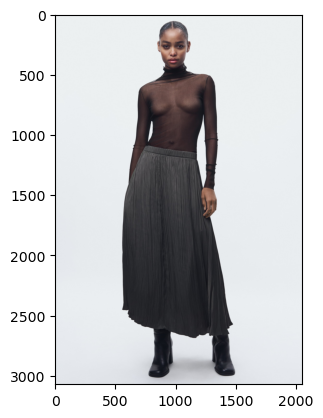

In [58]:
images_dict = type_garments['0']
plt.imshow(images_dict[0])
plt.show()


In [6]:
processed_images = preprocess_images(images_dict)

In [12]:
i = 0
for j, img in enumerate(processed_images):
    if img.shape != (224, 224, 3):
        print("Index:", j)
        i = j

print(i)
#code before to find the index that didnt have shape (224, 224, 3) to delete it
processed_cpy = processed_images.copy()
del processed_cpy[i]


# Convertir la lista de imágenes a un array de NumPy
#processed_images_array = np.array(processed_cpy)

#print(processed_images_array.shape)


Index: 744
744


In [15]:
# for vgg16
#features = extract_features(processed_cpy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

ValueError: as_list() is not defined on an unknown TensorShape.

In [13]:
#for resnet50
features_resnet = extract_features_resnet(processed_cpy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step

In [14]:
print(features_resnet.shape)
#print(features)

(1148, 1, 2048)


In [15]:
from sklearn.decomposition import PCA

def apply_pca(features, n_components=2):
    pca = PCA(n_components=n_components)
    reduced_features = pca.fit_transform(features)
    return reduced_features


In [17]:
#for vgg16
#flattened_features = features.reshape(len(features), 512)

#for resnet50
flattened_features_resnet = features_resnet.reshape(len(features_resnet), 2048)
# Dimensiones de flattened_features
print(flattened_features_resnet.shape) 

(1148, 2048)


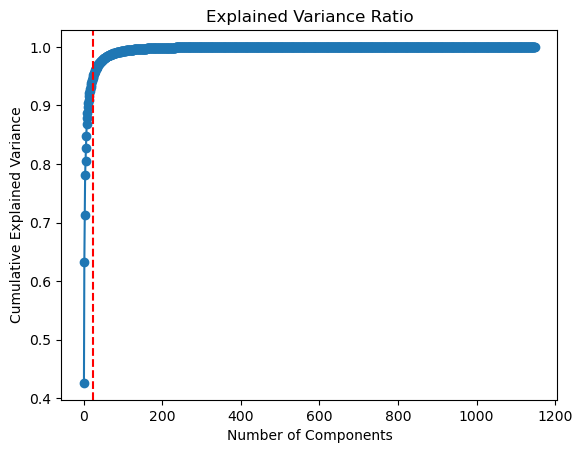

Número de componentes principales seleccionados: 25


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def select_n_components(features, explained_variance_threshold=0.95):
    pca = PCA()
    pca.fit(features)
    explained_variance = pca.explained_variance_ratio_
    
    # Calcula la suma acumulativa de la varianza explicada
    cumulative_explained_variance = np.cumsum(explained_variance)
    
    # Encuentra el número de componentes que explican una cantidad específica de varianza
    n_components = np.argmax(cumulative_explained_variance >= explained_variance_threshold) + 1
    
    # Grafica la varianza explicada acumulativa
    plt.plot(np.arange(1, len(explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance Ratio')
    plt.axvline(x=n_components, color='r', linestyle='--')
    plt.show()
    
    return n_components

# Utilizar la función para seleccionar el número de componentes principales
n_components = select_n_components(flattened_features_resnet)
print("Número de componentes principales seleccionados:", n_components)


In [19]:
reduced_features_pca = apply_pca(flattened_features_resnet, n_components=n_components)
print(reduced_features_pca.shape)

(1148, 25)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


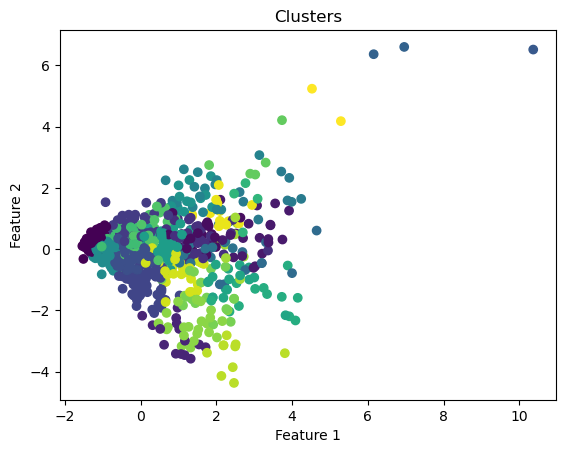

In [84]:
'''
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Preparación de datos

# Supongamos que tienes tus vectores de características en 'features'

# 2. Selección del número de clusters
num_clusters = 30  # Elige el número de clusters

# 3. Entrenamiento del modelo K-Means
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(reduced_features_pca)

# 4. Asignación de clusters
labels = kmeans.predict(reduced_features_pca)

# 5. Visualización de clusters (opcional)
# Si tus características tienen una dimensión baja (por ejemplo, después de aplicar PCA)
# puedes visualizar los clusters en un espacio de baja dimensión.
# De lo contrario, puedes usar t-SNE para reducir la dimensión antes de visualizar.

# Visualización en 2D (usando PCA)
plt.scatter(reduced_features_pca[:, 0], reduced_features_pca[:, 1], c=labels, cmap='viridis')
plt.title('Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
'''

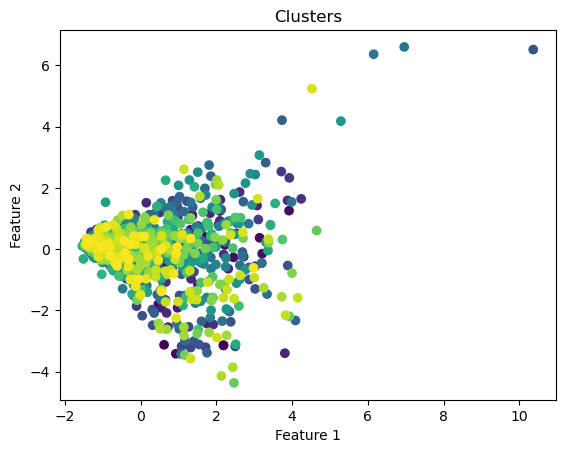

In [85]:
'''
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# 1. Preparación de datos
# Supongamos que tienes tus vectores de características en 'features'

# 2. Entrenamiento del modelo KNN
k = 5  # Número de vecinos
knn = NearestNeighbors(n_neighbors=k)
knn.fit(reduced_features_pca)

# 3. Asignación de clusters
distances, indices = knn.kneighbors(reduced_features_pca)

# Puedes asignar clusters basados en los índices de vecinos más cercanos o
# la distancia de los vecinos más cercanos, según lo que necesites.

# 4. Visualización de clusters (opcional)
# Visualización en 2D (usando PCA)
plt.scatter(reduced_features_pca[:, 0], reduced_features_pca[:, 1], c=indices[:, 0], cmap='viridis')
plt.title('Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
'''

In [20]:
images_cpy = images_dict.copy()
del images_cpy[i]

In [24]:
'''
import matplotlib.pyplot as plt

def visualize_cluster(cluster_labels, images, cluster_number):
    cluster_indices = [i for i, label in enumerate(cluster_labels) if label == cluster_number]
    
    # Mostrar las imágenes del cluster
    num_images = len(cluster_indices)
    
    for i, idx in enumerate(cluster_indices):
        plt.figure(figsize=(5, 5))  # Tamaño de la figura
        plt.imshow(images[idx])  # Mostrar la imagen
        plt.axis('off')  # Ocultar los ejes
        plt.title(f'Image {idx}')  # Título con el índice de la imagen
        plt.show()  # Mostrar la imagen


# Supongamos que 'cluster_labels' es una lista que contiene las etiquetas de los clusters para cada imagen
# y 'images' es una lista que contiene las imágenes correspondientes
visualize_cluster(labels, images_cpy, cluster_number=0)
'''

"\nimport matplotlib.pyplot as plt\n\ndef visualize_cluster(cluster_labels, images, cluster_number):\n    cluster_indices = [i for i, label in enumerate(cluster_labels) if label == cluster_number]\n    \n    # Mostrar las imágenes del cluster\n    num_images = len(cluster_indices)\n    \n    for i, idx in enumerate(cluster_indices):\n        plt.figure(figsize=(5, 5))  # Tamaño de la figura\n        plt.imshow(images[idx])  # Mostrar la imagen\n        plt.axis('off')  # Ocultar los ejes\n        plt.title(f'Image {idx}')  # Título con el índice de la imagen\n        plt.show()  # Mostrar la imagen\n\n\n# Supongamos que 'cluster_labels' es una lista que contiene las etiquetas de los clusters para cada imagen\n# y 'images' es una lista que contiene las imágenes correspondientes\nvisualize_cluster(labels, images_cpy, cluster_number=0)\n"

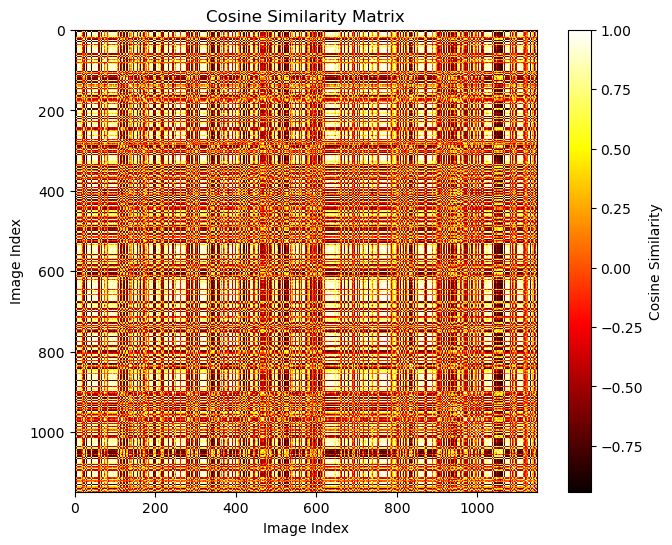

In [67]:
from sklearn.metrics.pairwise import cosine_similarity


def plot_similarity_matrix(cosine_similarities):
    plt.figure(figsize=(8, 6))
    plt.imshow(cosine_similarities, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Cosine Similarity')
    plt.title('Cosine Similarity Matrix')
    plt.xlabel('Image Index')
    plt.ylabel('Image Index')
    plt.show()

# Supongamos que 'cosine_similarities' es la matriz de similitud que calculamos anteriormente
# Supongamos que 'feature_vectors' es una matriz donde cada fila representa el vector de características de una imagen
# Calculamos la similitud del coseno entre todos los pares de vectores de características
cosine_similarities = cosine_similarity(reduced_features_pca, reduced_features_pca)

cosine_df = pd.DataFrame(cosine_similarities)

# Save the DataFrame to a CSV file
cosine_df.to_csv("./cosine_similarity.csv", index=False, header = False)

plot_similarity_matrix(cosine_similarities)


In [31]:
print(type(cosine_similarities))

<class 'numpy.ndarray'>


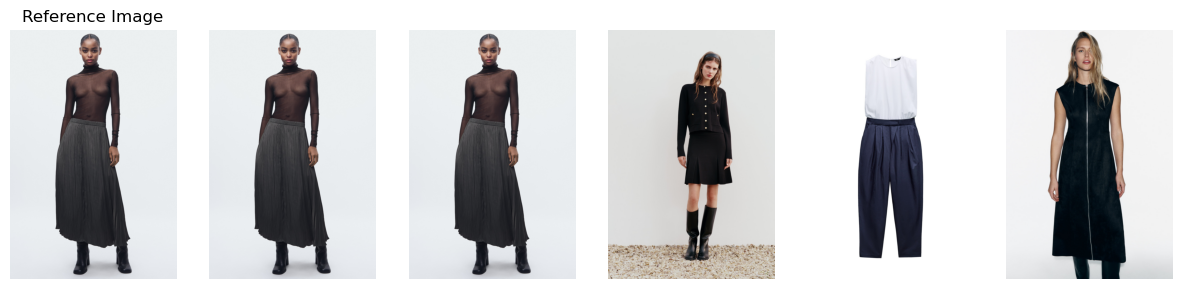

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Supongamos que tienes una matriz de similitud de coseno llamada cosine_similarities
# y una lista de imágenes llamada images

# Elegir la primera imagen como referencia
reference_image_index = 1

# Calcular las similitudes de la primera imagen con todas las demás
similarities = cosine_similarities[reference_image_index]

# Excluir la primera imagen de las más similares
# Obtener los índices de las imágenes más similares
top_indices = np.argsort(similarities)[-5:][::-1]

# Visualizar las 3 imágenes más similares
fig, axes = plt.subplots(1, 6, figsize=(15, 5))

# Mostrar la imagen de referencia
axes[0].imshow(images_cpy[reference_image_index])
axes[0].set_title('Reference Image')
axes[0].axis('off')

# Mostrar las 3 imágenes más similares
for i, index in enumerate(top_indices, start=1):
    axes[i].imshow(images_cpy[index])
    axes[i].axis('off')

plt.show()


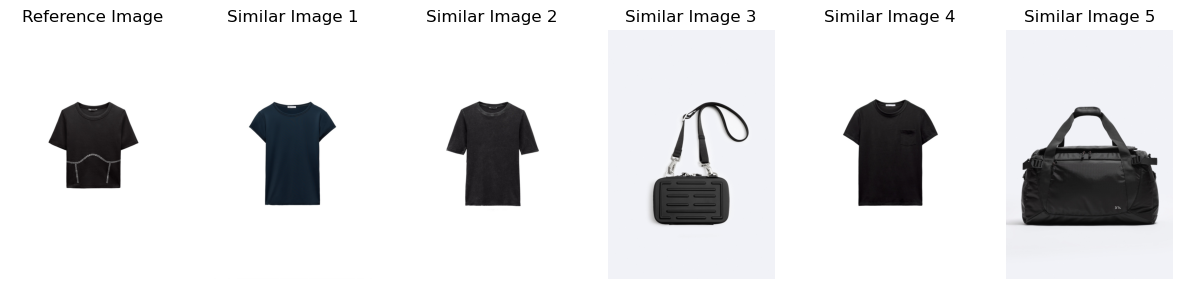

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

def visualize_similar_images(cosine_similarities, images, reference_image_index, n=5):
    # Calcular las similitudes de la imagen de referencia con todas las demás
    similarities = cosine_similarities[reference_image_index]

    # Excluir la imagen de referencia de las más similares
    similarities[reference_image_index] = -1

    # Obtener los índices de las imágenes más similares
    top_indices = np.argsort(similarities)[-n:][::-1]

    # Visualizar las imágenes
    fig, axes = plt.subplots(1, n+1, figsize=(15, 5))

    # Mostrar la imagen de referencia
    axes[0].imshow(images[reference_image_index])
    axes[0].set_title('Reference Image')
    axes[0].axis('off')

    # Mostrar las imágenes más similares
    for i, index in enumerate(top_indices, start=1):
        axes[i].imshow(images[index])
        axes[i].set_title(f'Similar Image {i}')
        axes[i].axis('off')

    plt.show()

# Utiliza la función para mostrar las 5 imágenes más similares a la imagen de referencia
visualize_similar_images(cosine_similarities, images_cpy, reference_image_index=123, n=5)


In [40]:
len(urls)

147954